In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU,SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [3]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(50, 24))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [4]:
# mat1=scipy.io.loadmat('/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/nina_DB4_prep.mat')
# nina_raw_train=mat1['Training_process_data']
# nina_raw_test=mat1['Testing_process_data'] 
# print('raw_Train_data',nina_raw_train)
# print('raw_Test_data',nina_raw_test)

In [5]:
# # files.upload()
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/nina_DB4_Train.csv", nina_raw_train, delimiter=",")

In [6]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/nina_DB4_Test.csv", nina_raw_test, delimiter=",")

In [7]:
N_FEATURES = 12

In [8]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'Class_label']


In [9]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [10]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [11]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [12]:
# import os
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/Total_process_TT/'
# naveen_path
path='/media/naveen/nav/mat_codes/nina_DB4_codes/naveen_prep_nlw/Total_process_TT/'
# olsson_path
# path='/media/naveen/nav/mat_codes/nina_DB4_codes/olsson_prep_nb/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/Total_process_TT/'

In [13]:
# file_path_train=path+'nina_pro_nb_DB4_Train'+'.'+'csv'
# naveen_train
file_path_train=path+'nina_naveen_nlw_DB4_Train'+'.'+'csv'
# olsson_train
# file_path_train=path+'nina_olsson_nb_DB4_Train'+'.'+'csv'
# file_path_train=path+'nina_pro_DB2_Train'+'.'+'csv'
print(file_path_train)

/media/naveen/nav/mat_codes/nina_DB4_codes/naveen_prep_nlw/Total_process_TT/nina_naveen_nlw_DB4_Train.csv


In [14]:
# file_path_test=path+'nina_pro_nb_DB4_Test'+'.'+'csv'
# naveen_test
file_path_test=path+'nina_naveen_nlw_DB4_Test'+'.'+'csv'
# olsson_test
# file_path_test=path+'nina_olsson_nb_DB4_Test'+'.'+'csv'
# file_path_test=path+'Test_data'+'.'+'csv'
print(file_path_test)

/media/naveen/nav/mat_codes/nina_DB4_codes/naveen_prep_nlw/Total_process_TT/nina_naveen_nlw_DB4_Test.csv


In [15]:
# Load data set containing all the data from csv
df_Train = read_data_Train(file_path_train)
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(10)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 20800000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,14,8,16,12,27,64,33,15,1,3,33,111,1.0
1,21,10,15,10,28,34,27,14,1,4,12,118,1.0
2,29,9,14,8,29,5,21,15,1,3,10,126,1.0
3,43,1,14,6,29,7,15,20,1,4,28,127,1.0
4,51,11,14,4,28,13,9,27,2,4,40,127,1.0
5,30,6,14,2,25,19,3,36,2,3,44,127,1.0
6,1,4,14,1,22,18,2,38,2,3,41,127,1.0
7,1,5,14,0,26,20,3,25,1,3,32,118,1.0
8,11,3,14,0,30,20,2,4,1,3,18,103,1.0
9,16,4,12,0,24,16,1,18,1,4,1,99,1.0


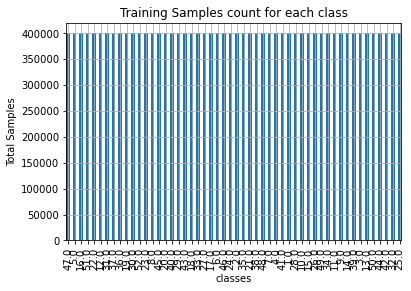

In [16]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [17]:
df_Test = read_data_Test(file_path_test)
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(20)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 10400000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,107,14,12,7,99,19,5,71,58,102,22,91,1.0
1,106,16,10,8,75,12,16,71,58,104,20,41,1.0
2,102,18,9,7,48,40,40,72,54,105,16,24,1.0
3,93,18,7,5,54,48,78,32,47,107,9,64,1.0
4,79,19,6,3,76,29,98,4,37,107,2,83,1.0
5,69,20,7,0,91,23,45,35,26,107,5,94,1.0
6,50,21,7,2,98,81,29,90,20,103,7,97,1.0
7,8,17,6,1,101,110,45,72,28,88,2,99,1.0
8,38,10,4,6,97,116,30,15,43,70,18,96,1.0
9,64,2,3,11,78,116,29,27,56,61,36,85,1.0


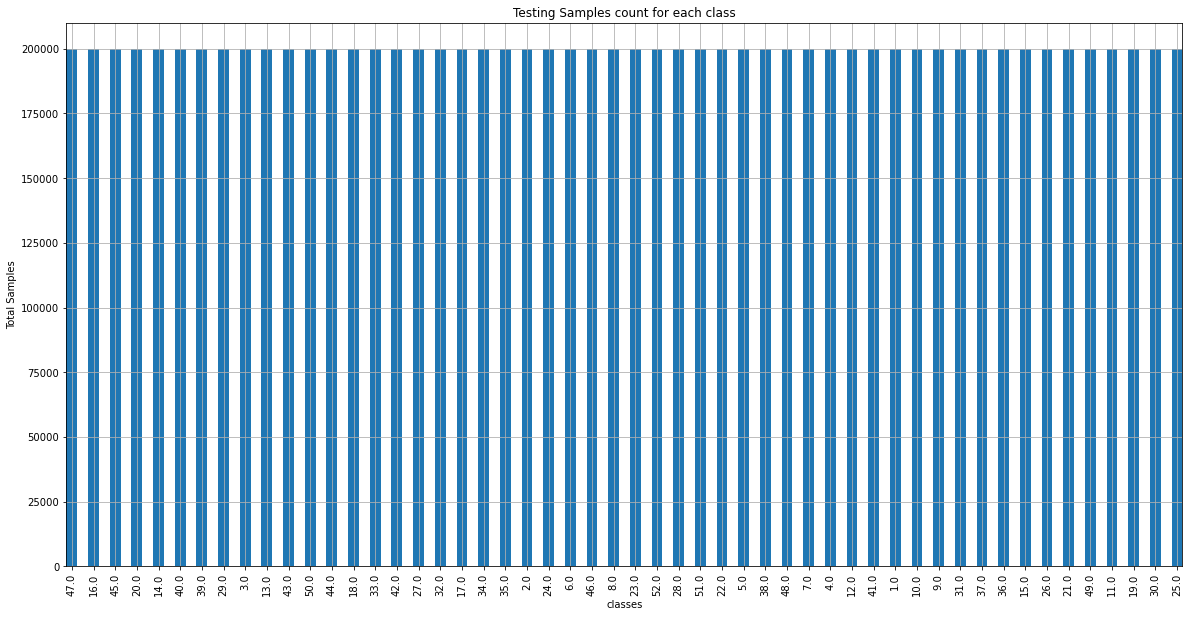

In [18]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
# Better understand how the recordings are spread across the different
# users who participated in the study
#df['user-id'].value_counts().plot(kind='bar',
#                                  title='Training Examples by User')

In [19]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
print('df_test_size',df_Test)

df_train_size           C1   C2   C3   C4  C5   C6   C7  C8  C9  C10  C11  C12  Class_label  \
0         14    8   16   12  27   64   33  15   1    3   33  111          1.0   
1         21   10   15   10  28   34   27  14   1    4   12  118          1.0   
2         29    9   14    8  29    5   21  15   1    3   10  126          1.0   
3         43    1   14    6  29    7   15  20   1    4   28  127          1.0   
4         51   11   14    4  28   13    9  27   2    4   40  127          1.0   
...       ..  ...  ...  ...  ..  ...  ...  ..  ..  ...  ...  ...          ...   
20799995  96  102   10   84  31   37  127  95  40  103  127   10         52.0   
20799996  52   87   66  102  19  102  103  82  44   91  127   17         52.0   
20799997  13   30   96  114  22   56   72  77  47   81  127   55         52.0   
20799998  71   29   99  119  33   36   46  78  49   74  127   86         52.0   
20799999  82   83  100  122  49   99   57  87  49   70  127   94         52.0   

          Act

In [20]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label,ActivityEncoded
0,14,8,16,12,27,64,33,15,1,3,33,111,1.00000,0
1,21,10,15,10,28,34,27,14,1,4,12,118,1.00000,0
2,29,9,14,8,29,5,21,15,1,3,10,126,1.00000,0
3,43,1,14,6,29,7,15,20,1,4,28,127,1.00000,0
4,51,11,14,4,28,13,9,27,2,4,40,127,1.00000,0


In [21]:
# df_Train.iloc[0:4,0:n_features]
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [22]:
scaler.mean_

array([66.78816909, 67.09997976, 57.78775279, 45.15280803, 47.64478043,
       46.64337702, 48.42338923, 57.60651135, 48.84772409, 67.67233827,
       47.87213111, 46.54944178])

In [23]:
scaler.scale_

array([38.5291428 , 40.14725113, 39.37045072, 35.65688909, 38.3394672 ,
       38.49931664, 38.04073717, 38.16223778, 38.68681719, 40.06498658,
       40.76100326, 36.19526608])

In [24]:
# result=df_Train.iloc[0:2,0:N_FEATURES].values
# print(result)

In [25]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [26]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label,ActivityEncoded
0,-1.37008,-1.47208,-1.06140,-0.92977,-0.53847,0.45083,-0.40544,-1.11646,-1.23680,-1.61419,-0.36486,1.78064,1.00000,0
1,-1.18840,-1.42226,-1.08680,-0.98586,-0.51239,-0.32841,-0.56317,-1.14266,-1.23680,-1.58923,-0.88006,1.97403,1.00000,0
2,-0.98077,-1.44717,-1.11220,-1.04195,-0.48631,-1.08167,-0.72090,-1.11646,-1.23680,-1.61419,-0.92913,2.19505,1.00000,0
3,-0.61741,-1.64644,-1.11220,-1.09804,-0.48631,-1.02972,-0.87862,-0.98544,-1.23680,-1.58923,-0.48753,2.22268,1.00000,0
4,-0.40977,-1.39736,-1.11220,-1.15413,-0.51239,-0.87387,-1.03635,-0.80201,-1.21095,-1.58923,-0.19313,2.22268,1.00000,0


In [27]:
# result=df_Train.iloc[1:3,0:N_FEATURES].values
# print(result)

In [28]:
# result=df_Test.iloc[0:2,0:N_FEATURES].values
# print(result)

In [29]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label,ActivityEncoded
0,107,14,12,7,99,19,5,71,58,102,22,91,1.00000,0
1,106,16,10,8,75,12,16,71,58,104,20,41,1.00000,0
2,102,18,9,7,48,40,40,72,54,105,16,24,1.00000,0
3,93,18,7,5,54,48,78,32,47,107,9,64,1.00000,0
4,79,19,6,3,76,29,98,4,37,107,2,83,1.00000,0


In [30]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [31]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label,ActivityEncoded
0,1.04367,-1.32263,-1.16300,-1.07000,1.33949,-0.71802,-1.14150,0.35096,0.23657,0.85680,-0.63473,1.22808,1.00000,0
1,1.01772,-1.27281,-1.21380,-1.04195,0.71350,-0.89984,-0.85233,0.35096,0.23657,0.90672,-0.68379,-0.15332,1.00000,0
2,0.91390,-1.22300,-1.23920,-1.07000,0.00927,-0.17256,-0.22143,0.37717,0.13318,0.93168,-0.78193,-0.62299,1.00000,0
3,0.68031,-1.22300,-1.29000,-1.12609,0.16576,0.03524,0.77750,-0.67099,-0.04776,0.98160,-0.95366,0.48212,1.00000,0
4,0.31695,-1.19809,-1.31540,-1.18218,0.73958,-0.45828,1.30325,-1.40470,-0.30625,0.98160,-1.12539,1.00705,1.00000,0


In [32]:
# result=df_Test.iloc[1:3,0:N_FEATURES].values
# print(result)

In [33]:
# The number of steps within one time segment
TIME_PERIODS = 10000
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 10000

In [34]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [35]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (2079, 10000, 12)
2079 training samples
y_train shape:  (2079,)
10000
12
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]
x_train shape: (10000, 12)
input_shape: (10000, 12)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (2079, 52)


In [36]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)
# score = model_m.evaluate(x_test, y_test_hot, verbose=1)
# print('\nAccuracy on test data: %0.2f' % score[1])
# print('\nLoss on test data: %0.2f' % score[0])

x_test shape:  (1039, 10000, 12)
1039 testing samples
y_test shape:  (1039,)


In [37]:
# n_steps, n_length = 9, 57
# n_steps, n_length = 3, 171
n_steps, n_length = 25, 400
n_depth = 12
# n_steps, n_length = 19, 27
x_train = x_train.reshape((x_train.shape[0], n_steps, n_length, n_depth))
print('x_train shape: ', x_train.shape)
x_test = x_test.reshape((x_test.shape[0], n_steps, n_length, n_depth))
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (2079, 25, 400, 12)
x_test shape:  (1039, 25, 400, 12)
n_outputs 52


In [38]:
# pd.options.display.float_format = '{:.1f}'.format
# sns.set() # Default seaborn look and feel
# plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program

LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

keras version  2.4.0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [39]:
def step_decay(epoch):
   initial_lrate = 1e-3
   drop = 0.1
   epochs_drop = 70.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [40]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [41]:
verbose, epochs, batch_size = 0, 200, 32

In [42]:
# # naveen_architecture
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l2(1e-04)), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l2(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l2(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l2(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Flatten()))
# # model.add(Flatten())
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
# model.add(Flatten())
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Flatten())
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Flatten())
# # # model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.3))
model.add(Dense(512, activation='tanh'))
# model.add(Dense(200, activation='tanh'))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Dense(n_outputs, activation='softmax'))

In [43]:
# # olsson architecture
# model = Sequential()
# model.add(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(MaxPooling2D(pool_size=(8,1),strides=(2,1)))
# model.add(Activation('tanh'))
# model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dropout(0.2093))
# model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))

In [44]:
adam=optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, amsgrad=False)
checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN_LSTM100X100/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 25, 200, 64)       6976      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 25, 200, 64)       256       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 25, 97, 64)        0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 25, 97, 64)        0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 25, 49, 64)        20544     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 25, 49, 64)        256       
_________________________________________________________________
time_distributed_6 (TimeDist (None, 25, 49, 64)        0

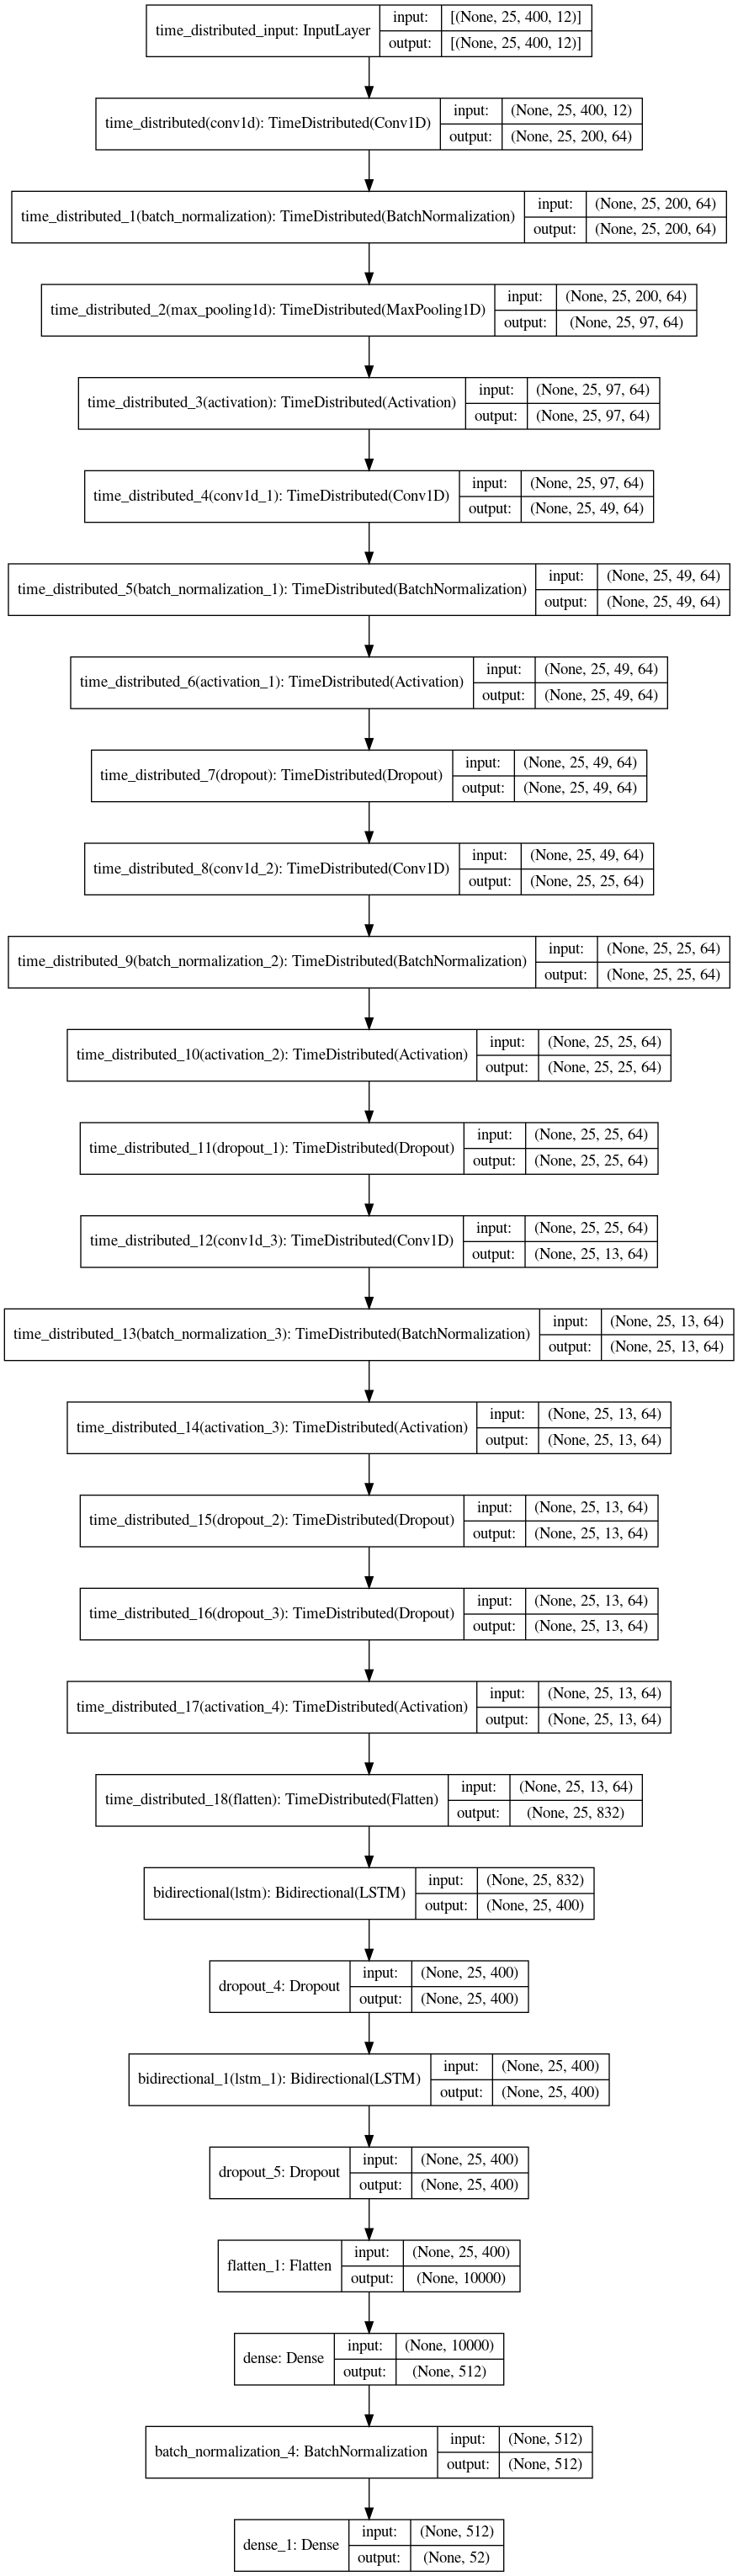

In [45]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN_LSTM100X100/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [46]:
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN_LSTM100X100/LSTM_nina_100X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate],validation_data=(x_test, y_test_hot),verbose=1)

Epoch 1/200
65/65 [==============================] - 23s 192ms/step - loss: 4.9781 - accuracy: 0.0382 - val_loss: 3.9176 - val_accuracy: 0.1039

Epoch 00001: val_accuracy improved from -inf to 0.10395, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN_LSTM100X100/checkpoint.hdf5
Epoch 2/200
65/65 [==============================] - 2s 35ms/step - loss: 3.5742 - accuracy: 0.1161 - val_loss: 3.5579 - val_accuracy: 0.1752

Epoch 00002: val_accuracy improved from 0.10395 to 0.17517, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN_LSTM100X100/checkpoint.hdf5
Epoch 3/200
65/65 [==============================] - 2s 36ms/step - loss: 2.9382 - accuracy: 0.2079 - val_loss: 2.7043 - val_accuracy: 0.2637

Epoch 00003: val_accuracy improved from 0.17517 to 0.26372, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN_LSTM100X100/checkpoint.hdf5
Epoch 4/200
65/65 [==============================] - 2s 36ms/step - loss: 2.2977 - acc

65/65 [==============================] - 2s 35ms/step - loss: 0.0641 - accuracy: 0.9985 - val_loss: 0.5395 - val_accuracy: 0.8681

Epoch 00034: val_accuracy did not improve from 0.87777
Epoch 35/200
65/65 [==============================] - 2s 34ms/step - loss: 0.0701 - accuracy: 0.9957 - val_loss: 1.1192 - val_accuracy: 0.7190

Epoch 00035: val_accuracy did not improve from 0.87777
Epoch 36/200
65/65 [==============================] - 3s 42ms/step - loss: 0.1009 - accuracy: 0.9851 - val_loss: 0.7096 - val_accuracy: 0.8142

Epoch 00036: val_accuracy did not improve from 0.87777
Epoch 37/200
65/65 [==============================] - 2s 36ms/step - loss: 0.1329 - accuracy: 0.9774 - val_loss: 0.7565 - val_accuracy: 0.7998

Epoch 00037: val_accuracy did not improve from 0.87777
Epoch 38/200
65/65 [==============================] - 2s 36ms/step - loss: 0.1413 - accuracy: 0.9745 - val_loss: 0.8639 - val_accuracy: 0.7806

Epoch 00038: val_accuracy did not improve from 0.87777
Epoch 39/200
65/65

65/65 [==============================] - 2s 35ms/step - loss: 0.0357 - accuracy: 0.9975 - val_loss: 0.6041 - val_accuracy: 0.8518

Epoch 00075: val_accuracy did not improve from 0.87777
Epoch 76/200
65/65 [==============================] - 2s 37ms/step - loss: 0.0338 - accuracy: 0.9996 - val_loss: 0.6144 - val_accuracy: 0.8499

Epoch 00076: val_accuracy did not improve from 0.87777
Epoch 77/200
65/65 [==============================] - 2s 37ms/step - loss: 0.0386 - accuracy: 0.9976 - val_loss: 0.6059 - val_accuracy: 0.8518

Epoch 00077: val_accuracy did not improve from 0.87777
Epoch 78/200
65/65 [==============================] - 2s 35ms/step - loss: 0.0386 - accuracy: 0.9974 - val_loss: 0.5948 - val_accuracy: 0.8499

Epoch 00078: val_accuracy did not improve from 0.87777
Epoch 79/200
65/65 [==============================] - 2s 34ms/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 0.6029 - val_accuracy: 0.8527

Epoch 00079: val_accuracy did not improve from 0.87777
Epoch 80/200
65/65

65/65 [==============================] - 2s 33ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 0.5520 - val_accuracy: 0.8730

Epoch 00116: val_accuracy did not improve from 0.87777
Epoch 117/200
65/65 [==============================] - 2s 34ms/step - loss: 0.0259 - accuracy: 0.9996 - val_loss: 0.5469 - val_accuracy: 0.8701

Epoch 00117: val_accuracy did not improve from 0.87777
Epoch 118/200
65/65 [==============================] - 2s 33ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.5446 - val_accuracy: 0.8720

Epoch 00118: val_accuracy did not improve from 0.87777
Epoch 119/200
65/65 [==============================] - 2s 33ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.5498 - val_accuracy: 0.8720

Epoch 00119: val_accuracy did not improve from 0.87777
Epoch 120/200
65/65 [==============================] - 2s 34ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.5482 - val_accuracy: 0.8739

Epoch 00120: val_accuracy did not improve from 0.87777
Epoch 121/200


65/65 [==============================] - 2s 35ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.5229 - val_accuracy: 0.8710

Epoch 00157: val_accuracy did not improve from 0.87777
Epoch 158/200
65/65 [==============================] - 2s 35ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.5208 - val_accuracy: 0.8710

Epoch 00158: val_accuracy did not improve from 0.87777
Epoch 159/200
65/65 [==============================] - 2s 35ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.5194 - val_accuracy: 0.8739

Epoch 00159: val_accuracy did not improve from 0.87777
Epoch 160/200
65/65 [==============================] - 2s 35ms/step - loss: 0.0253 - accuracy: 0.9985 - val_loss: 0.5230 - val_accuracy: 0.8730

Epoch 00160: val_accuracy did not improve from 0.87777
Epoch 161/200
65/65 [==============================] - 2s 35ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.5138 - val_accuracy: 0.8681

Epoch 00161: val_accuracy did not improve from 0.87777
Epoch 162/200


65/65 [==============================] - 2s 34ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.5091 - val_accuracy: 0.8739

Epoch 00198: val_accuracy did not improve from 0.87777
Epoch 199/200
65/65 [==============================] - 2s 34ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.5150 - val_accuracy: 0.8749

Epoch 00199: val_accuracy did not improve from 0.87777
Epoch 200/200
65/65 [==============================] - 2s 34ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.5169 - val_accuracy: 0.8720

Epoch 00200: val_accuracy did not improve from 0.87777


In [47]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

epoch_number 25
train accuracy and validation accuracy 0.9956709742546082 0.8777670860290527


In [48]:
model.save('/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN_LSTM100X100/CNN_LSTM_nina_100X100')

INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN_LSTM100X100/CNN_LSTM_nina_100X100/assets


INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN_LSTM100X100/CNN_LSTM_nina_100X100/assets


history loss
history accuracy
history val_loss
history val_accuracy
history lr


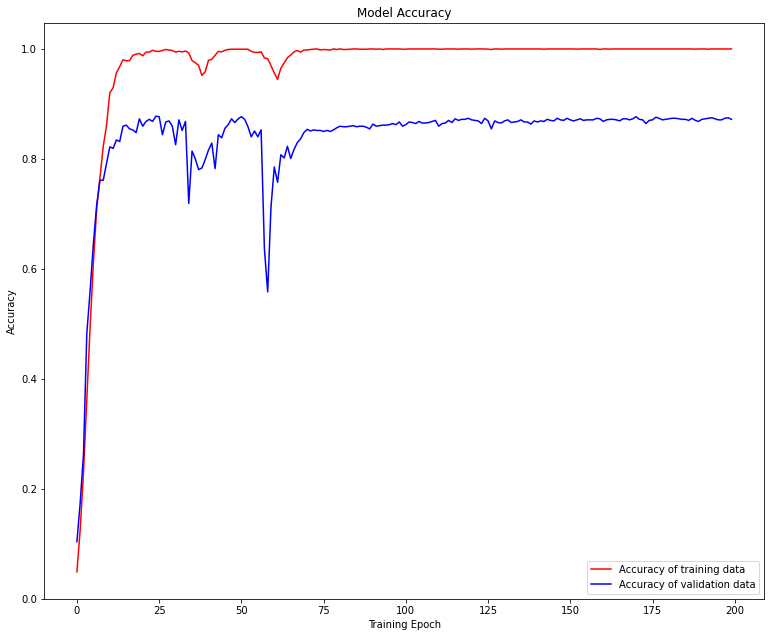

In [49]:
for i in history.history:
    print("history",i)
figDB4a=plt.figure(figsize=(10, 8),edgecolor='black')
ax= figDB4a.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
ax.set(facecolor="white")
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy
history lr


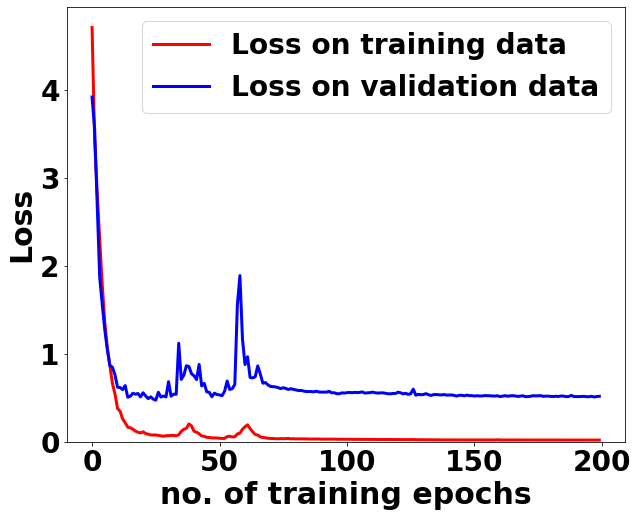

In [50]:
for i in history.history:
    print("history",i)
# facecolor='black'
# ax= figDB4.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black") 

figDB4=plt.figure(figsize=(10, 8),edgecolor='black')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 28}

plt.rc('font', **font)

# SMALL_SIZE = 12
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 18

# figBPR.suptitle('test title', fontsize=20)
#plt.rc('xlabel', fontsize=14, weight = 'bold')
#plt.rc('ylabel', fontsize=14, weight = 'bold')

# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
# plt.rc('axes', labelsize=MEDIUM_SIZE )     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE, weight = 'bold')    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE )  # fontsize of the figure title

# ax=figBPR.add_axes(("left", "bottom", "width", "height"))
# ax= figDB4.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
ax.spines["top"].set_linewidth(3)
ax.spines["top"].set_linestyle("-")
ax.spines["bottom"].set_linewidth(3)
ax.spines["bottom"].set_linestyle("-")
ax.spines["left"].set_linewidth(3)
ax.spines["left"].set_linestyle("-")
ax.spines["right"].set_linewidth(3)
ax.spines["right"].set_linestyle("-")
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['loss'], 'r-', linewidth=3, label='Loss on training data')
plt.plot(history.history['val_loss'], 'b-', linewidth=3, label='Loss on validation data')
# plt.title('Loss curve for NinaPro DB4',fontsize=18, weight = 'bold')

plt.ylabel('Loss',fontsize=30, weight = 'bold')
plt.xlabel('no. of training epochs',fontsize=30, weight = 'bold')
# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [51]:
figDB4.savefig('/media/naveen/nav/plots/NinaPro_DB4_25X400.eps')
# figDB4.savefig('/media/naveen/nav/plots/NinaPro_DB4_25X400.pdf')

In [52]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

33/33 [==============================] - 0s 12ms/step - loss: 0.4848 - accuracy: 0.8778
test_accuracy 0.8777670860290527


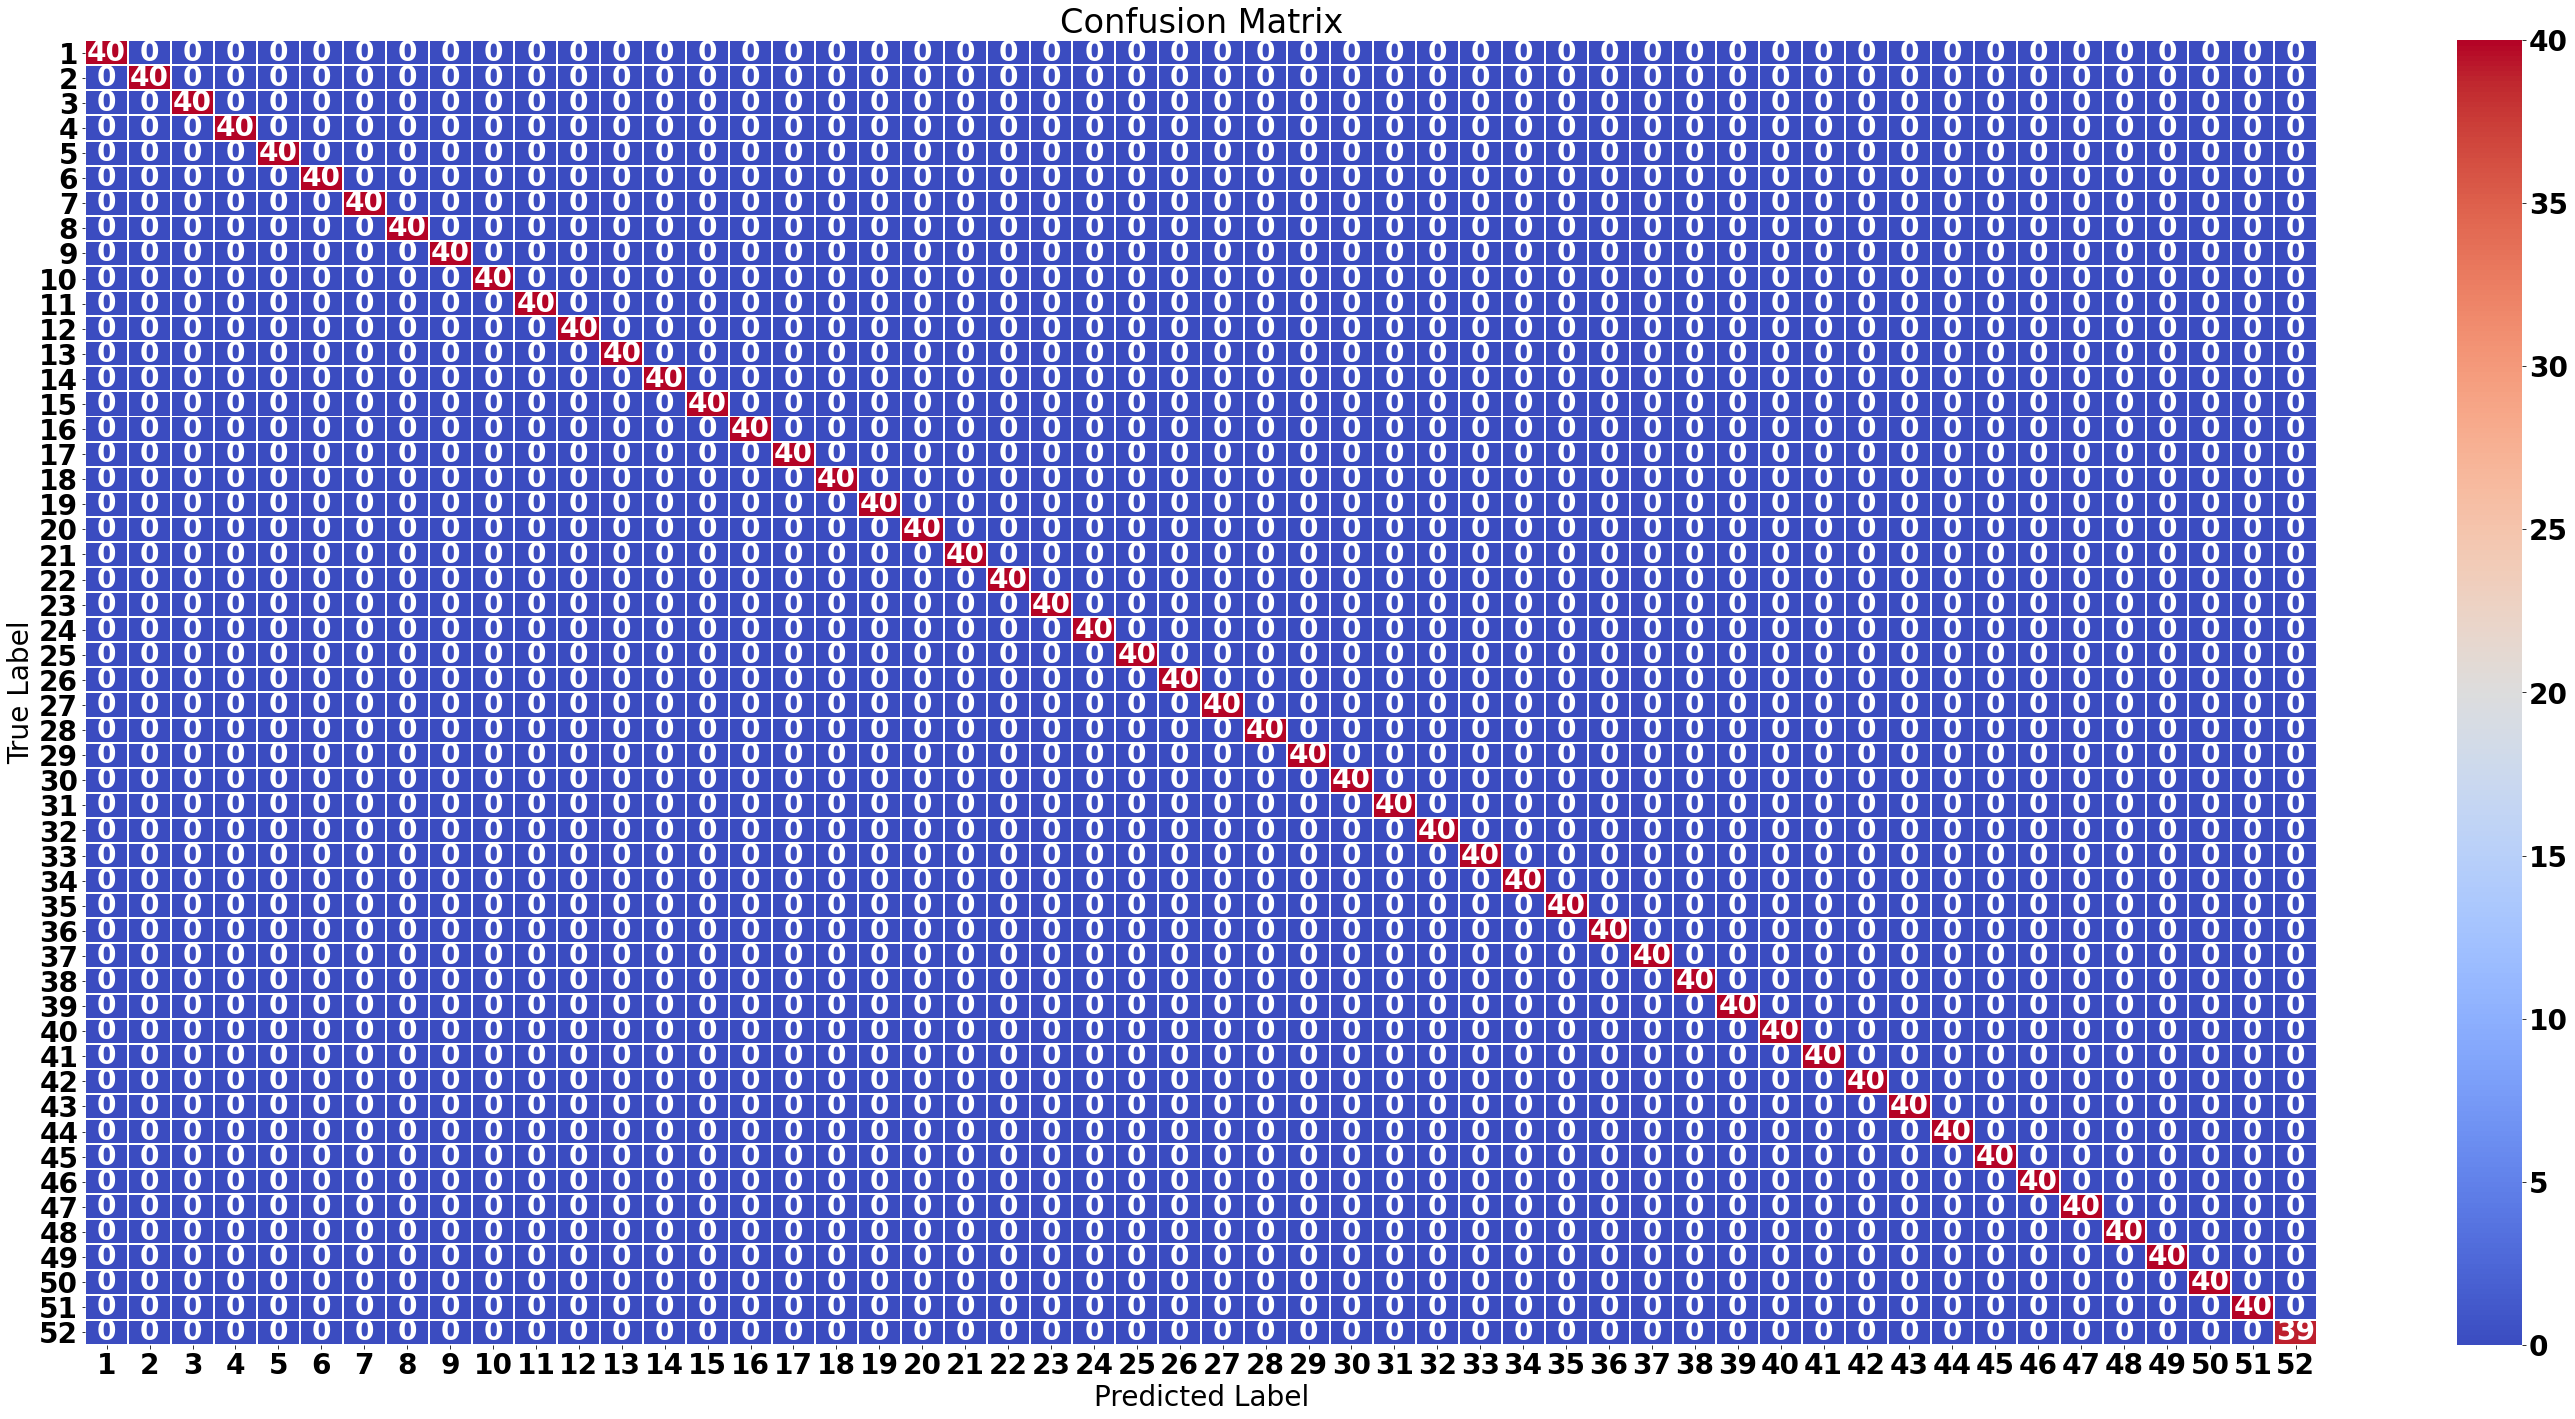

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        40
           9       1.00      1.00      1.00        40
          10       1.00      1.00      1.00        40
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        40
          13       1.00      1.00      1.00        40
          14       1.00      1.00      1.00        40
          15       1.00      1.00      1.00        40
          16       1.00      1.00      1.00        40
          17       1.00    

In [53]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

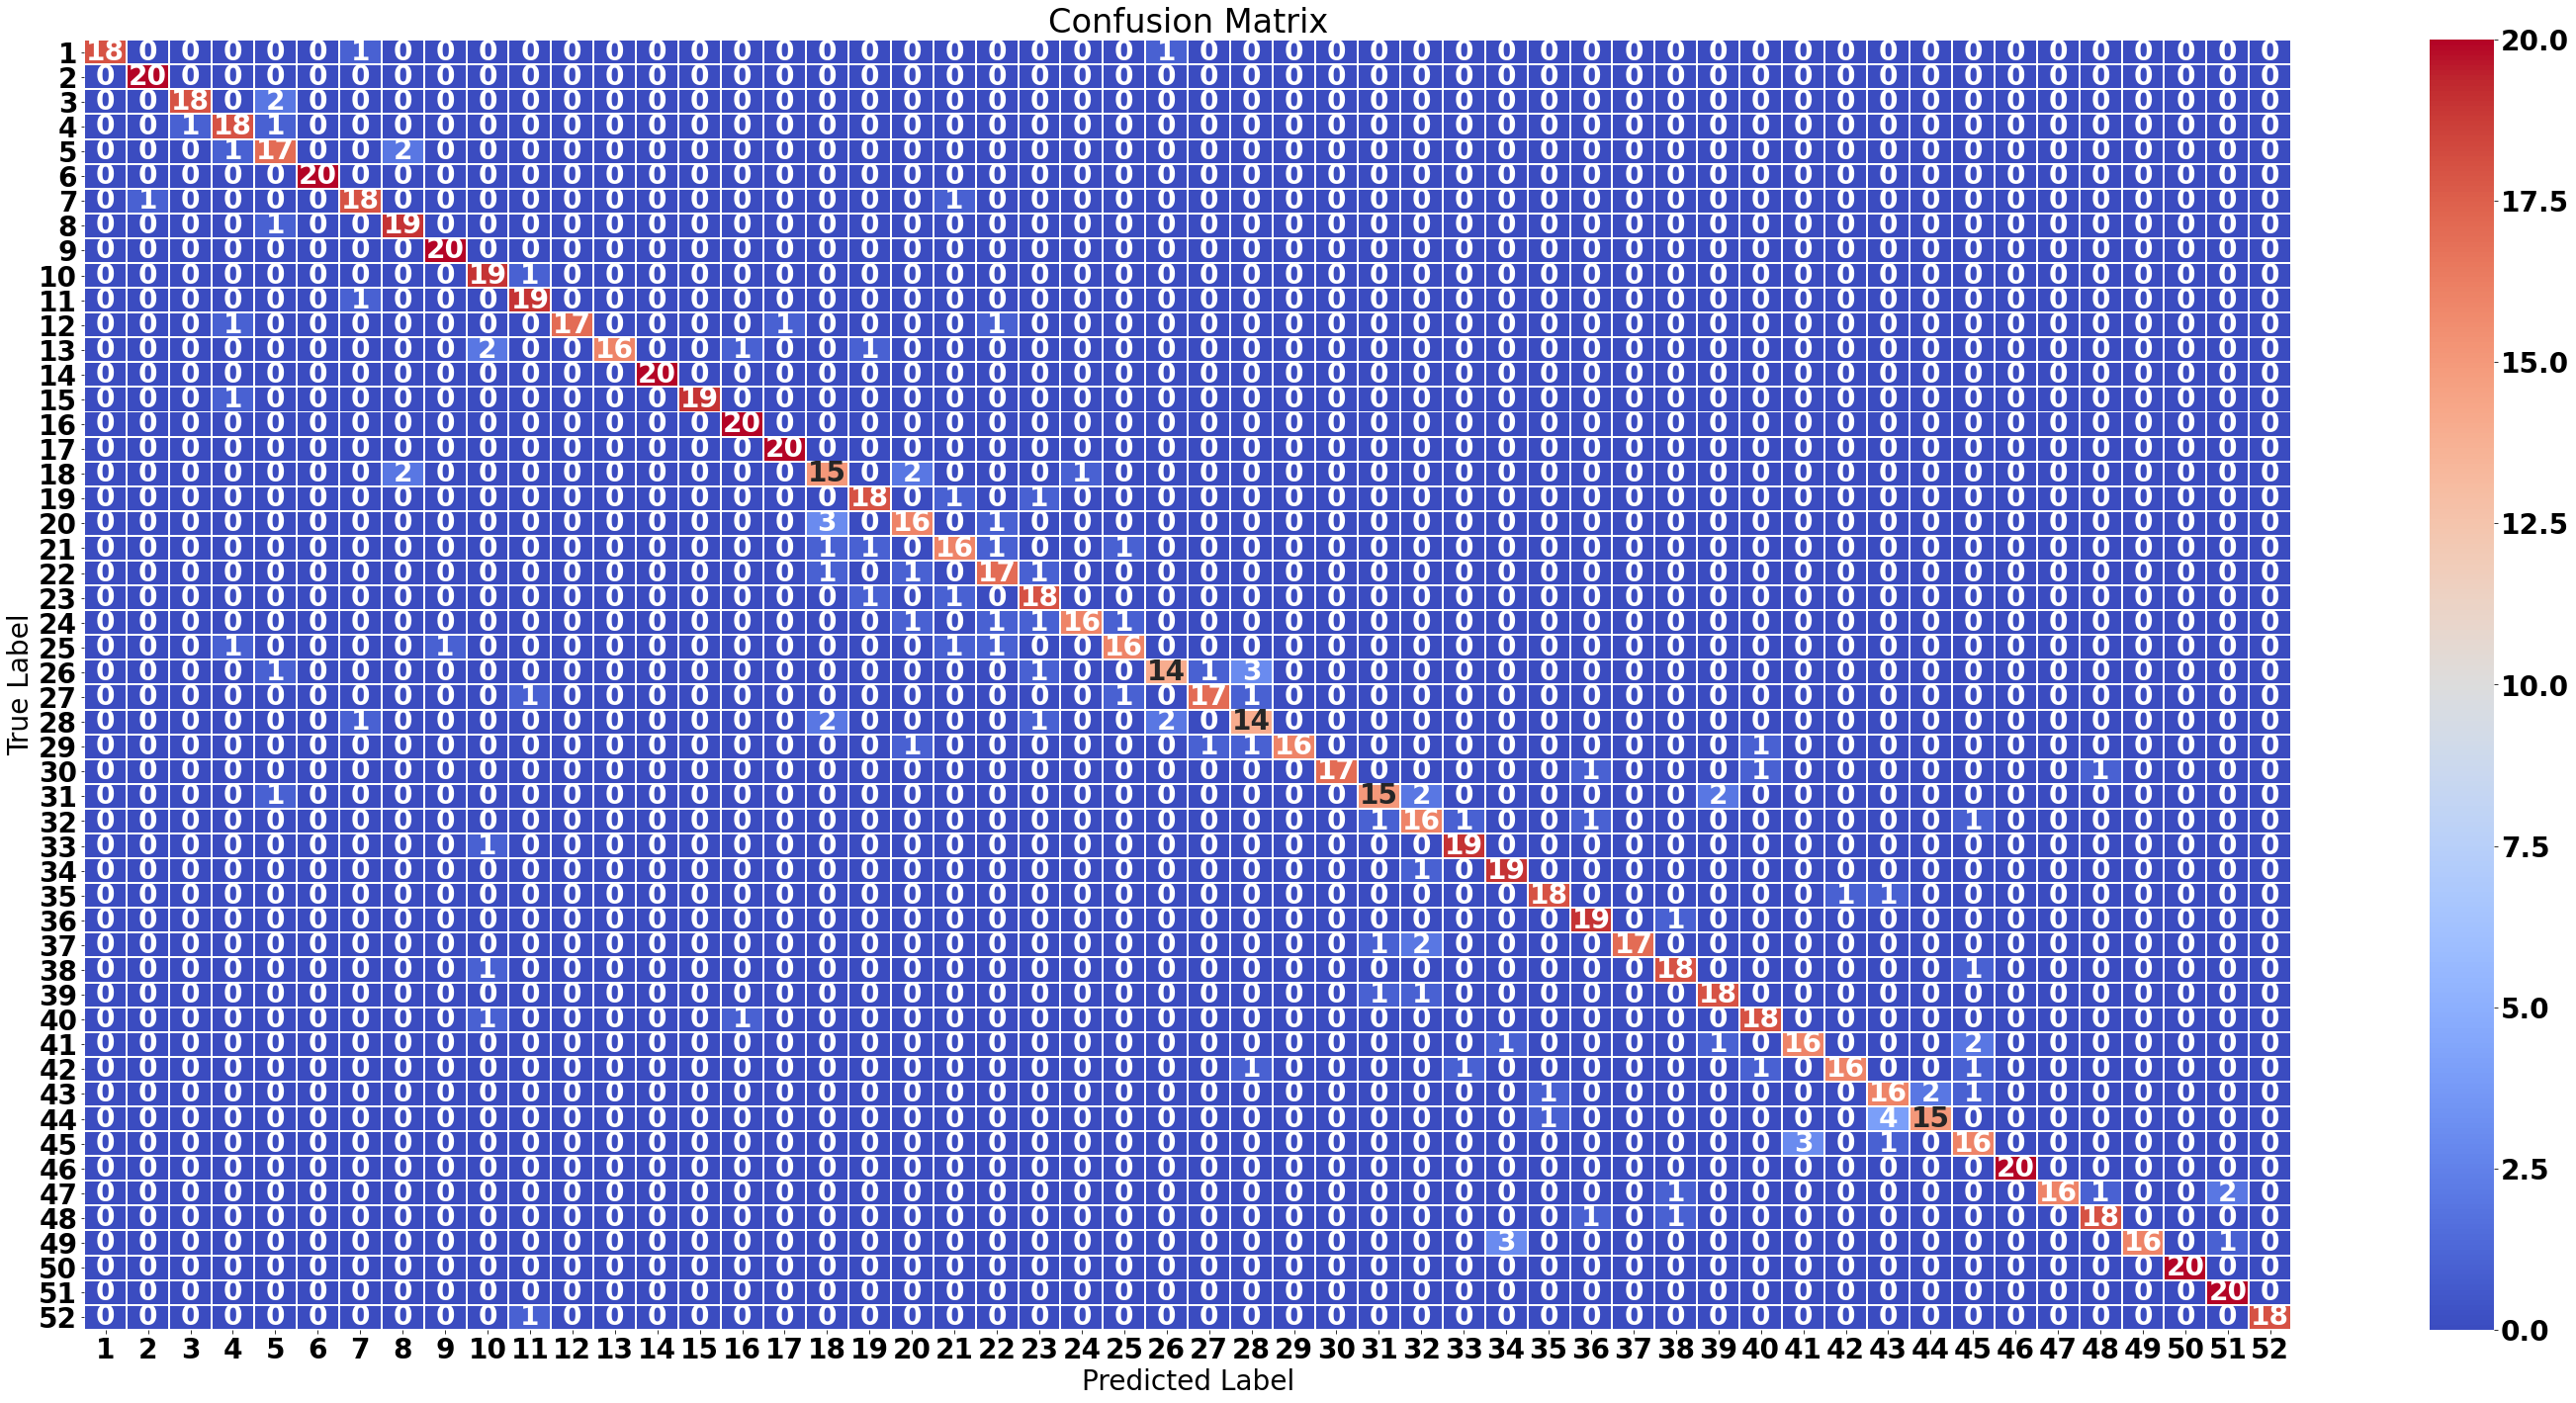

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.95      1.00      0.98        20
           2       0.95      0.90      0.92        20
           3       0.82      0.90      0.86        20
           4       0.74      0.85      0.79        20
           5       1.00      1.00      1.00        20
           6       0.86      0.90      0.88        20
           7       0.83      0.95      0.88        20
           8       0.95      1.00      0.98        20
           9       0.79      0.95      0.86        20
          10       0.86      0.95      0.90        20
          11       1.00      0.85      0.92        20
          12       1.00      0.80      0.89        20
          13       1.00      1.00      1.00        20
          14       1.00      0.95      0.97        20
          15       0.91      1.00      0.95        20
          16       0.95      1.00      0.98        20
          17       0.68    

In [54]:
fopen = open("/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN_LSTM100X100/naveen_DB4_test.csv","a")
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
for i in range(0, len(max_y_pred_test)):
    fopen.writelines(str(max_y_test[i])+","+str(max_y_pred_test[i])+"\n")
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))
fopen.close()

In [55]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))